In [125]:
# The purpose of our project is to calculate CREDIT RISK. 
# The data was gathered from Lending Club.  
# The link is https://www.lendingclub.com/info/download-data.action
# There is also a data dictionary that comes along, below is the link
# https://docs.google.com/spreadsheets/d/191B2yJ4H1ZPXq0_ByhUgWMFZOYem5jFz0Y3by_7YBY4/edit#gid=2081333097
# Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan
# with investors looking to lend money and make a return.


In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [91]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


In [127]:
# reading our dataset, with some parameters tuned for our ease
dataset = pd.read_csv('C:/LoanStats3a.csv', skiprows = 1, low_memory = False)

In [128]:
# our dataset's shape is (42538 X 145)
# taking a look at the variables
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 145 entries, id to settlement_term
dtypes: float64(115), object(30)
memory usage: 47.1+ MB


In [129]:
# some info about our dataset
dataset.shape


(42538, 145)

In [130]:
# there are 115 variables of float type and 30 object type
# checking for duplicates
dataset.duplicated().sum()


0

In [131]:
# there are no duplicate rows
# checking for missing values, creation of a Series object
isnull = dataset.isnull().sum()

In [132]:
# I choose to drop all columns that have more than 20% missing values.
missing= isnull[isnull > (0.2 * 42538) ]
dataset = dataset.drop(missing.index , axis = 1)

In [133]:
# rechecking of shape
dataset.shape

(42538, 53)

In [ ]:
# now the number of columns is 53.
# below are the columns, that we are not going to iclude in our model, with a brief explaining next to it
"""
funded_amnt: leaks data from the future (after the loan is already started to be funded)
funded_amnt_inv: also leaks data from the future (after the loan is already started to be funded)
grade: contains redundant information as the interest rate column (int_rate)
sub_grade: also contains redundant information as the interest rate column (int_rate)
emp_title: requires other data and a lot of processing to potentially be useful
issue_d: leaks data from the future (after the loan is already completed funded)
zip_code: redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible (which only can be used to identify the state the borrower lives in)
out_prncp: leaks data from the future, (after the loan already started to be paid off)
out_prncp_inv: also leaks data from the future, (after the loan already started to be paid off)
total_pymnt: also leaks data from the future, (after the loan already started to be paid off)
total_pymnt_inv: also leaks data from the future, (after the loan already started to be paid off)
total_rec_prncp: also leaks data from the future, (after the loan already started to be paid off)
total_rec_int: leaks data from the future, (after the loan already started to be paid off),
total_rec_late_fee: also leaks data from the future, (after the loan already started to be paid off),
recoveries: also leaks data from the future, (after the loan already started to be paid off),
collection_recovery_fee: also leaks data from the future, (after the loan already started to be paid off),
last_pymnt_d: also leaks data from the future, (after the loan already started to be paid off),
last_pymnt_amnt: also leaks data from the future, (after the loan already started to be paid off).
"""

In [134]:
# therefore we are going to drop them
dataset = dataset.drop([ "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", 
"emp_title", "issue_d","zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", 
"total_rec_prncp","total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", 
"last_pymnt_d", "last_pymnt_amnt"] , axis = 1)

In [135]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 35 columns):
loan_amnt                     42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
emp_length                    42535 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null object
purpose                       42535 non-null object
title                         42523 non-null object
addr_state                    42535 non-null object
dti                           42535 non-null float64
delinq_2yrs                   42506 non-null float64
earliest_cr_line              42506 non-null object
inq_last_6mths                42506 non-null float64
o

In [136]:
# after all the above, our dataset consists of 37 columns
# 18 are floats and 19 are objects
# it is time to define our target - y variable. It is the column with the name loan_status
# let's explore it a little bit
dataset['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [137]:
# there are 4 categories. the two that state that the credit policy is not met, are of no importance
# to us. So, we will only keep those rows, that have the corresponding values, Fully Paid and                                             34116
# Charged Off. To explain things much further, Charged Off means that the loan was not paid, and 
# Fully Paid states the obvious
dataset = dataset[(dataset['loan_status'] == 'Fully Paid') |(dataset['loan_status'] == 'Charged Off') ]


In [138]:
dataset.shape


(39786, 35)

In [139]:
# the rows became less, 39786 to be precise
# another thing we should attend to is converting the column to a numeric type, and we choose 
# Fully paid to be equal to 1 and Charged off to be equal to 0.    

dataset['loan_status'] = dataset['loan_status'].str.replace('Fully Paid' , '1')                               
dataset['loan_status'] = dataset['loan_status'].str.replace('Charged Off' , '0') 

In [140]:
# still our target variable is referred as an object.
# loan_status                   39786 non-null object 
# i will convert it to a float
dataset['loan_status'] = dataset['loan_status'].astype('float')

In [141]:
# let us take another look
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39786 entries, 0 to 39785
Data columns (total 35 columns):
loan_amnt                     39786 non-null float64
term                          39786 non-null object
int_rate                      39786 non-null object
installment                   39786 non-null float64
emp_length                    39786 non-null object
home_ownership                39786 non-null object
annual_inc                    39786 non-null float64
verification_status           39786 non-null object
loan_status                   39786 non-null float64
pymnt_plan                    39786 non-null object
purpose                       39786 non-null object
title                         39776 non-null object
addr_state                    39786 non-null object
dti                           39786 non-null float64
delinq_2yrs                   39786 non-null float64
earliest_cr_line              39786 non-null object
inq_last_6mths                39786 non-null float64


In [142]:
# Another thing we could check, to enhance our preprocessing, would be to check the columns, for their
# unique values. If a column contains only one value, then it is of no practical need for any model
dataset.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [143]:
# i will iterate through every column, and append to uniquevaluelist, the length of the unique 
# values, if the length is equal to 1
uniquevaluelist = []
for column in dataset.columns:
    col_uniq = dataset[column].unique()
    if len(col_uniq) == 1:
        uniquevaluelist.append(column)

In [144]:
print(uniquevaluelist)

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt', 'hardship_flag', 'disbursement_method']


In [145]:
# Now let us drop the above columns
dataset = dataset.drop(uniquevaluelist, axis = 1)

In [146]:
# and again take a look for extra missing values
dataset.isnull().sum()

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
loan_status                     0
purpose                         0
title                          10
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     50
total_acc                       0
last_credit_pull_d              2
collections_12_mths_ex_med     56
chargeoff_within_12_mths       56
pub_rec_bankruptcies          697
tax_liens                      39
debt_settlement_flag            0
dtype: int64

In [147]:
# there are still a few columns, containing missing values. we could follow two approaches
# we could impute them, IF they are numeric variables , or we could just drop the rows containing 
# these values. I choose to drop them

dataset = dataset.dropna()

In [148]:
#####   CATEGORICAL VARIABLES  ##########3
# what about our categorical variables. I will create a dataframe, categdf, containing only them.
# I'll take a look at them, and after that i will investigate for each column its unique values.
categdf = dataset.select_dtypes(include = ['object'])
categdf.head()

,term,int_rate,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d,debt_settlement_flag
0,36 months,10.65%,10+ years,RENT,Verified,credit_card,Computer,AZ,Jan-1985,83.7%,Sep-2018,N
1,60 months,15.27%,< 1 year,RENT,Source Verified,car,bike,GA,Apr-1999,9.4%,Oct-2016,N
2,36 months,15.96%,10+ years,RENT,Not Verified,small_business,real estate business,IL,Nov-2001,98.5%,Jun-2017,N
3,36 months,13.49%,10+ years,RENT,Source Verified,other,personel,CA,Feb-1996,21%,Apr-2016,N
4,60 months,12.69%,1 year,RENT,Source Verified,other,Personal,OR,Jan-1996,53.9%,Apr-2018,N


In [ ]:
# right away i can see that two columns are dates, last_credit_pull_d, earliest_cr_line. they are
# gonna be dropped. moreover, column  1 int_rate and 9  revol_util ,are percentages, so
# it would be a good idea to turn them into numbers, by removing the % string

In [149]:
# furthermore, let us take a look at their unique values, almost the same way we did before
valuelist = []
for i in categdf.columns:
    valuelist.append(len(categdf[i].value_counts()))
print(valuelist)

[2, 336, 12, 4, 3, 14, 19193, 48, 526, 1089, 124, 2]


In [ ]:
# the column  'title' has 19193 unique values. There is no point in creating dummies. 
# The column with 1082 values is a date column, which as mentioned , will be dropped.

In [150]:
# let us proceed with some of the manipulations,meaning dropping all of the columns that
# we said will be dropped

dataset = dataset.drop(['title', 'earliest_cr_line','last_credit_pull_d'], axis = 1)

In [151]:
# replacing the % string from the columns mentioned above
dataset['int_rate'] = dataset['int_rate'].str.replace('%' , "")
#converting to numeric
dataset['int_rate'] = pd.to_numeric(dataset['int_rate'])

In [152]:
# doing the same for the revol_util column
dataset['revol_util'] = dataset['revol_util'].str.replace('%' , "")
dataset['revol_util'] = pd.to_numeric(dataset['revol_util'])

In [153]:
# checking
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39026 entries, 0 to 39692
Data columns (total 24 columns):
loan_amnt                     39026 non-null float64
term                          39026 non-null object
int_rate                      39026 non-null float64
installment                   39026 non-null float64
emp_length                    39026 non-null object
home_ownership                39026 non-null object
annual_inc                    39026 non-null float64
verification_status           39026 non-null object
loan_status                   39026 non-null float64
purpose                       39026 non-null object
addr_state                    39026 non-null object
dti                           39026 non-null float64
delinq_2yrs                   39026 non-null float64
inq_last_6mths                39026 non-null float64
open_acc                      39026 non-null float64
pub_rec                       39026 non-null float64
revol_bal                     39026 non-null floa

In [154]:
# again let us see what are our object cols
categdf = dataset.select_dtypes(include = ['object'])
categdf.head()

,term,emp_length,home_ownership,verification_status,purpose,addr_state,debt_settlement_flag
0,36 months,10+ years,RENT,Verified,credit_card,AZ,N
1,60 months,< 1 year,RENT,Source Verified,car,GA,N
2,36 months,10+ years,RENT,Not Verified,small_business,IL,N
3,36 months,10+ years,RENT,Source Verified,other,CA,N
4,60 months,1 year,RENT,Source Verified,other,OR,N


In [155]:
# rechecking for the unique values
valuelist2 = []
for i in categdf.columns:
    valuelist2.append(len(categdf[i].value_counts()))
print(valuelist2)

[2, 12, 4, 3, 14, 48, 2]


In [156]:
# I choose to drop  the 'grade' column , and aas for the addr_state, I think 48 dummies are too much
# and maybe the geography of the individual is not so important
dataset = dataset.drop(['addr_state'] , axis = 1 )

In [121]:
# so, finally, we know which variables, should be converted  to dummies
# they are the following
dataset.select_dtypes(include  = ['object']).columns

Index(['term', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'debt_settlement_flag'],
      dtype='object')

In [157]:
# creation of dummies
dataset  = pd.get_dummies(dataset, columns=['term', 'emp_length', 'home_ownership', 'verification_status',
                                            'purpose', 'debt_settlement_flag'])

In [158]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39026 entries, 0 to 39692
Data columns (total 54 columns):
loan_amnt                              39026 non-null float64
int_rate                               39026 non-null float64
installment                            39026 non-null float64
annual_inc                             39026 non-null float64
loan_status                            39026 non-null float64
dti                                    39026 non-null float64
delinq_2yrs                            39026 non-null float64
inq_last_6mths                         39026 non-null float64
open_acc                               39026 non-null float64
pub_rec                                39026 non-null float64
revol_bal                              39026 non-null float64
revol_util                             39026 non-null float64
total_acc                              39026 non-null float64
collections_12_mths_ex_med             39026 non-null float64
chargeoff_within_12_mth

In [159]:
#################   MACHINE LEARNING  ################
# creation of features
features = dataset.drop(['loan_status'], axis = 1)

# setting our X and y
X = features.values
y = dataset['loan_status'].values

#  TAKING CARE OF MISSING DATA
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0)
imputer = imputer.fit(X)
X = imputer.transform(X)

# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, random_state=0)



In [160]:
dataset['loan_status'].value_counts()

1.0    33494
0.0     5532
Name: loan_status, dtype: int64

In [161]:
# I will inspect four models and have alook at different metrics
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(random_state = 42)
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state=42)
import xgboost as xgb
from xgboost import XGBClassifier
classifier3 = XGBClassifier(random_state = 42)
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifierslist = [classifier1, classifier2, classifier3, classifier4]
f1list = []
acclist = []
preclist = []
rocauclist = []

for classifier in classifierslist:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import roc_auc_score 
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import confusion_matrix
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    ps = precision_score(y_test, y_pred)
    f1 = f1_score(y_test , y_pred)
    rocauclist.append(roc)
    f1list.append(f1)
    acclist.append(acc)
    preclist.append(ps)
    print(cm)

[[ 121 1001]
 [ 198 6486]]
[[   3 1119]
 [   3 6681]]
[[  32 1090]
 [   0 6684]]
[[  58 1064]
 [ 127 6557]]


C:\Users\tolaros\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [163]:
print(f1list, acclist,preclist,rocauclist)

[0.9153905864088633, 0.9225352112676056, 0.9246092128925163, 0.9167423977630199] [0.8464002049705355, 0.8562644119907763, 0.8603638227004868, 0.847425057647963] [0.8663015894216642, 0.8565384615384616, 0.8597890403910471, 0.8603857761448629] [0.5391100785017777, 0.5011124818786662, 0.5142602495543672, 0.5163464030952678]


C:\Users\tolaros\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


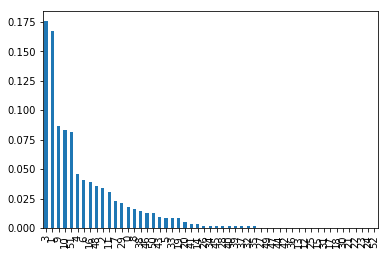

In [166]:
# taking a look at all the different metrics, XGB has the best f1, accuracy, and also gives us the
# information about feature importance, for which I am curious                                        
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
% matplotlib inline
featimp = pd.Series(classifier.feature_importances_ )
featimp.sort_values(ascending = False).plot(kind = 'bar')



In [167]:
# we can see that 5 features, outstand, so let us see their names.

# making a list with the indexes of the featimp Series object
importancelist = featimp.index
# getting the top 5 importances of the list
for i in importancelist[:5]:
# each column index, corresponds to a name of the columns of the featurs dataframe
    print(features.columns[i])


loan_amnt
int_rate
installment
annual_inc
dti


In [169]:
##### Latter comments#########

# We have achieved an accuracy of 86,3% , BUT we would have achieved an accuracy of  
dataset['loan_status'].mean()# just by stating that all loans are going to be repaid.

0.8582483472556757

In [170]:
dataset.describe()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,debt_settlement_flag_N,debt_settlement_flag_Y
count,39026.000000,39026.000000,39026.000000,3.902600e+04,39026.000000,39026.000000,39026.000000,39026.000000,39026.000000,39026.000000,...,39026.000000,39026.000000,39026.000000,39026.000000,39026.000000,39026.000000,39026.000000,39026.000000,39026.000000,39026.000000
mean,11263.118818,12.047554,325.015033,6.900435e+04,0.858248,13.366703,0.145621,0.866294,9.298340,0.055578,...,0.055425,0.017527,0.014657,0.099447,0.002639,0.045457,0.009583,0.023779,0.996156,0.003844
std,7481.001490,3.744767,208.931293,6.312842e+04,0.348800,6.668117,0.490301,1.067178,4.380305,0.238533,...,0.228810,0.131225,0.120177,0.299264,0.051307,0.208307,0.097426,0.152362,0.061878,0.061878
min,500.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,9.250000,167.340000,4.080000e+04,1.000000,8.240000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,10000.000000,11.860000,280.800000,5.920000e+04,1.000000,13.450000,0.000000,1.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,15000.000000,14.610000,431.307500,8.250000e+04,1.000000,18.630000,0.000000,1.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,35000.000000,24.590000,1305.190000,6.000000e+06,1.000000,29.990000,11.000000,8.000000,44.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
# the sum of the money loaned is
dataset['loan_amnt'].sum() # 439.5 million euros

439554475.0

In [174]:
# Taking a look at the dataset describe matrix we can see that
# the average loan amount is 11263 euros. The avg int rate is 12%.
# as we recall there were two major time spans for returning the money.
# 36 months and 60 months. Let us take a look more closely, because they were
# used as dummy variables
dataset['term_ 36 months'].sum() 


28343

In [173]:
dataset['term_ 60 months'].sum() 

10683

In [ ]:
# After some calculations we can say that every 36 months loan, will return around
# 2200 euros of profit, and each 60 month loan will return a 3800 euros of profit.
# To be more precise the weighted average profit is (28343/39026) * 2200euros + 
# (10683/39026)* 3800 euros = 2650 approximately. Meaning that from every loan we
# expect an average 2650 return. Of course it is an approximation, but it  gives
# us a  good clue.

In [ ]:
# So, regarding our predictions, we should focus mostly on avoiding bad loans,
# meaning loans that we predict they will be ok, but they end up in default,(false positives),
# because if we give such a loan, we will loose 11250 euros. On the other hand, if 
# we predict that someone will not repay his loan, and decide not to grant him a loan
# it is not such a big loss, because we loose a potential profit of 2650 euros,
# BUT we  are risk free. We just lost an opportunity,still there is no risk in our money.
# So, let us focus again on the false positives.

In [ ]:
# Taking a look, the cm with the least false positives is that of the logistic 
# regression, and this suits us perfectly,because the model has a parameter called
# class_weight. This tells scikit-learn to penalize the misclassification
# of the minority class during the training process

In [176]:
# Let us re-train the logistic regression with the change in the hyperparameter
classifier = LogisticRegression(class_weight="balanced")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 714  408]
 [2312 4372]]


In [ ]:
# now we can see that the false positives number has fallen to 408, but in respect
# the number of false negatives , true negatives have risen, and the number of
# true positives has also fallen. What is important for us is that the ratio between 
# the true positives and the false positives should be better than 5 to 1.
# For every 5 correct predictions, that will yield us 5 * 2650 = 13250, we can tolerate
# to mispredict 1 that will mean 11250 loss. Our ratio now is 4372/408 = 10.7
# which is pretty decent.

In [177]:
# My final test would be, to randomply split our dataset into several different
# training and testing sets, and calculate the average  number of false positives
# So I will create a empty list called false positivelist and append the
# cm[0,1] = number of false positives, and correspondingly do the same for
# the true positives:
truepositivelist = []
falsepositivelist = []
for i in np.random.randint(1000, size=20):
    from sklearn.model_selection import train_test_split
    X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2, 
                                                      random_state=i)
    classifier = LogisticRegression(class_weight="balanced")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    falsepositivelist.append(cm[0,1])
    truepositivelist.append(cm[1,1])

In [178]:
print(falsepositivelist)

[401, 416, 419, 427, 420, 383, 407, 419, 425, 392, 414, 401, 409, 370, 446, 383, 423, 447, 405, 420]


In [179]:
np.mean(falsepositivelist)

411.35

In [180]:
np.std(falsepositivelist)

19.110926194195823

In [182]:
print(truepositivelist)

[4415, 4414, 4462, 4476, 4449, 4457, 4399, 4473, 4509, 4428, 4433, 4415, 4439, 4381, 4352, 4381, 4432, 4417, 4404, 4426]


In [181]:
np.mean(truepositivelist)

4428.1

In [183]:
np.std(truepositivelist)

35.888577570029156

In [ ]:
# So , the average false positive number is 410 with an acceptable std of 15 and the 
# the average true positive list is 4392 with an std of 52. Our ratio based on these
# averages is 4392/410 = 10.71 , which is highly acceptable and profitable

In [ ]:








telling the classifier to penalize certain rows more, is actually much easier to
implement using scikit-learn.

We can do this by setting the class_weight parameter to balanced when creating the 
LogisticRegression instance. This tells scikit-learn  The penalty means that the logistic
regression classifier pays more attention to correctly classifying rows where 
loan_status is 0. This lowers accuracy when loan_status is 1, but raises accuracy when
loan_status is 0.



In [ ]:







# taking a look at all the different metrics, XGB has the best f1, accuracy, and also gives us the
# information about feature importance, for which I am curious                                        
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

featimp = pd.Series(classifier.feature_importances_ )
featimp.sort_values(ascending = False).plot(kind = 'bar')
classifier.feature_importances_

# we can see that 5 features, outstand, so let us see their names.

# making a list with the indexes of the featimp Series object
importancelist = featimp.index
# getting the top 5 importances of the list
for i in importancelist[:2]:
# each column index, corresponds to a name of the columns of the featurs dataframe
    print(features.columns[i])
    
# Comments: the annual income of an individual(makes perfect sense) and the int rate of the loan
# are the two most important factors
# Predicting the result
y_pred = classifier.predict(X_test)


      
#  MAKING CONFUSION MATRIX, PRECISION SCORES, ETC    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
clsfrprt = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
ps = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print (cm)


# APPLYING K-FOLD CROSS VALIDATION, to ensure that our model has no bias or variance on its predictions
